# Titanic

Reading in the titanic.csv file:

In [56]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
working_dir = Path(os.getcwd()).parent.absolute().parent.absolute()
path = Path(str(working_dir) +  "/data/titanic.csv")
with open(path, 'r') as file:
    df = pd.read_csv(file)
    

## 1. General Data

### 1.1. Age distribution

<Axes: ylabel='Frequency'>

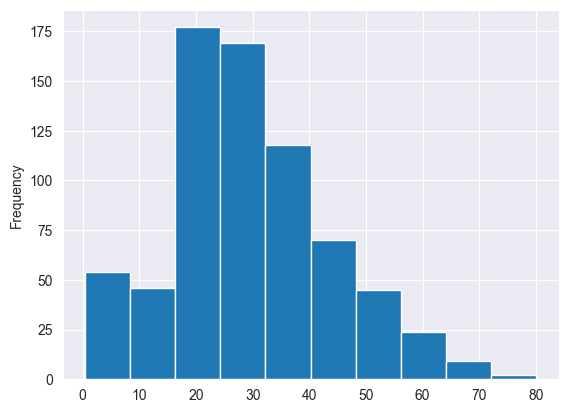

In [39]:
df['Age'].plot(kind='hist')

As you can see most of the people on the ship were between 20 and 35 years old. There is a really sharp drop before 20 year old and a more gradual drop after 35 years old

### 1.2 Gender distribution

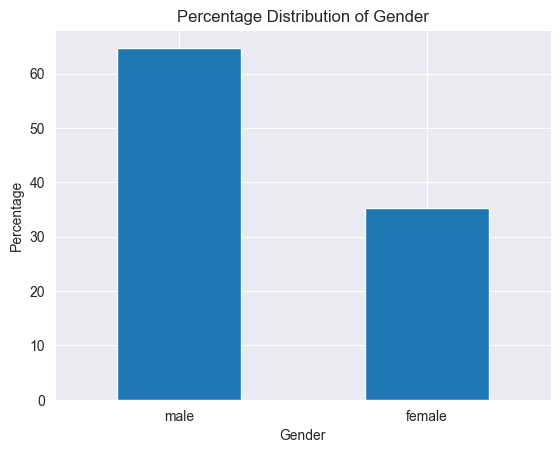

In [54]:
sex_distribution = df['Sex'].value_counts(normalize=True) * 100
sex_distribution.plot(kind='bar', rot=0)
plt.title('Percentage Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

There were more male passengers on board than female passengers

### 1.3 Class distribution

<Axes: xlabel='Pclass'>

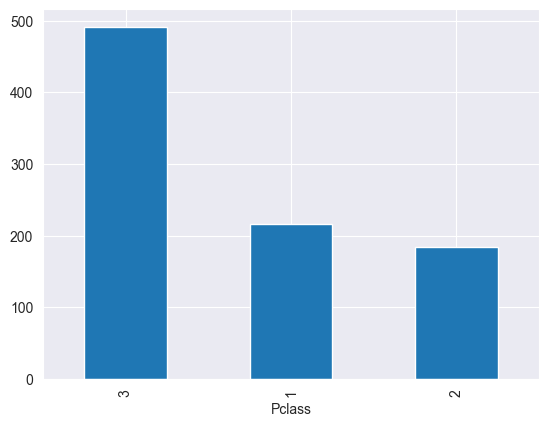

In [55]:
df['Pclass'].value_counts().plot(kind='bar')

Most of the people on the ship were in third class, followed by first class and then second class

### 1.4 Embarkation distribution

<Axes: xlabel='Embarked'>

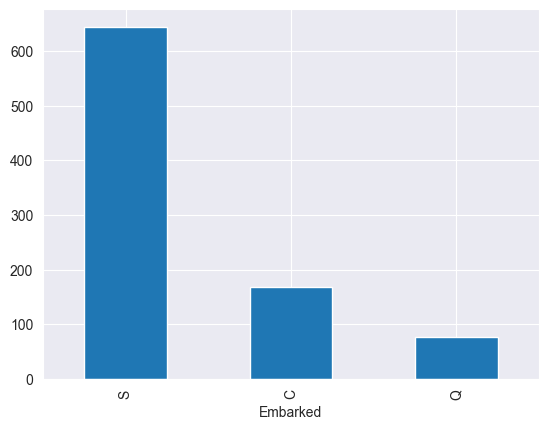

In [43]:
df['Embarked'].value_counts().plot(kind='bar')

Most of the people on the ship embarked from Southampton, followed by Cherbourg and then Queenstown

 ## 2. Data analysis

### 2.1 Deaths by class

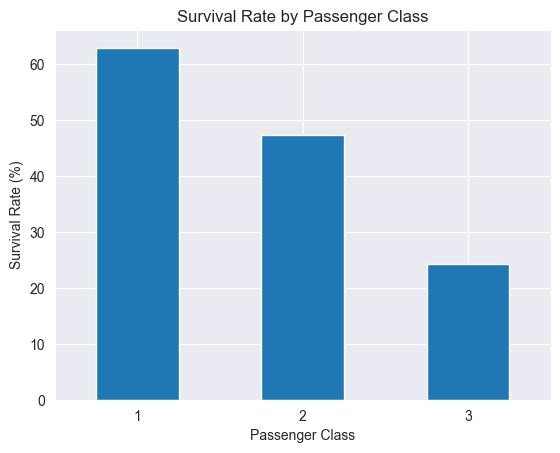

In [38]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
survival_rate_by_class.plot(kind='bar', rot=0)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.show()

As expected the survival rate is higher for people in higher classes. This could be because people in higher classes were prioritized when it came to saving people or because people in higher classes had cabins closer to the lifeboats.

### 2.2 Deaths by gender

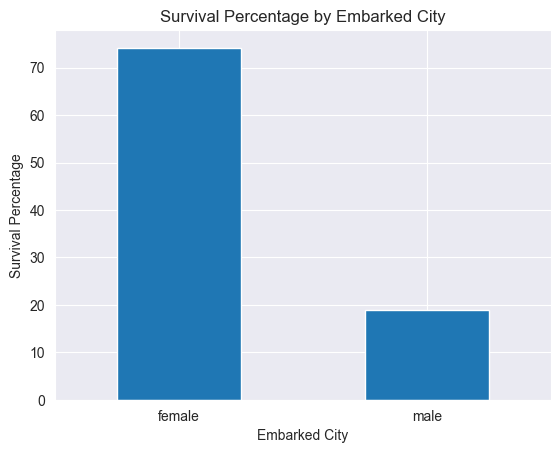

In [41]:
survival_percentage = df.groupby('Sex')['Survived'].mean() * 100
survival_percentage.plot(kind='bar', rot=0)
plt.title('Survival Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')
plt.show()

The survival percentage of female passengers is significantly higher than the survival rate of male passengers. This means that female passengers were most likely prioritized when it came to saving people and allocating lifeboats.

### 2.3 Deaths by age in percent

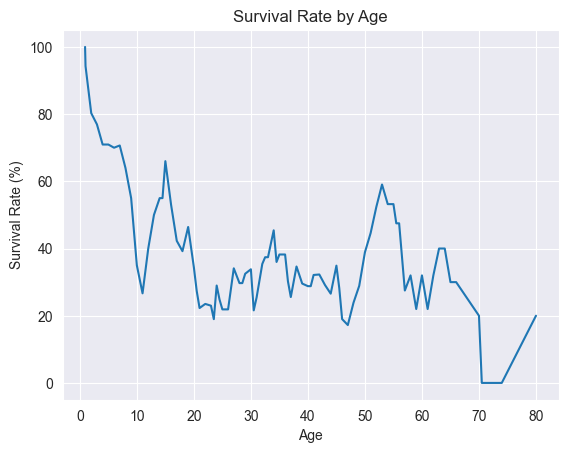

In [37]:
rolling_avg_survival_rate = df.groupby('Age')['Survived'].mean().rolling(window=5).mean() * 100
rolling_avg_survival_rate.plot(kind='line')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate (%)')
plt.show()

This plot shows that most of the people who died were between 20 and 35 years old. This could be because children and elderly people were prioritized when it came to saving people. Children were the most likely to survive and elderly people were the second most likely to survive.

### 2.4 Deaths by cabin

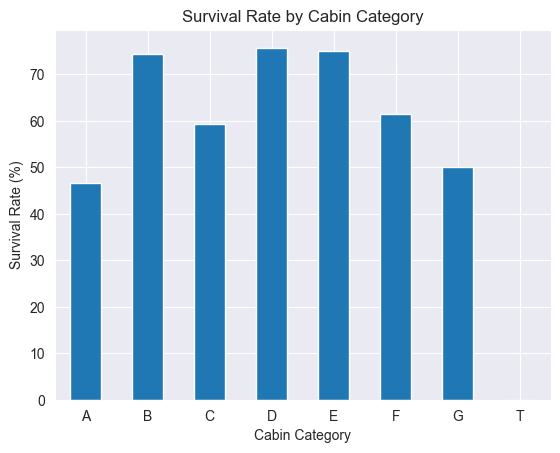

In [44]:
df['CabinCategory'] = df['Cabin'].str[0]

# Calculate the survival rate for each cabin category
survival_rate_by_cabin = df.groupby('CabinCategory')['Survived'].mean() * 100

# Plotting the bar chart
survival_rate_by_cabin.plot(kind='bar', rot=0)
plt.title('Survival Rate by Cabin Category')
plt.xlabel('Cabin Category')
plt.ylabel('Survival Rate (%)')
plt.show()

This graph shows the survival rate depending on the cabin the passenger was in. The survival rate is highest for people in cabins B, D and E. These were mostly first and second class cabins. The survival rate drops off significantly at F, G and E which were for third class passengers and on the lowest deck used for accommodation. One interesting observation is that passengers in cabin class A had the lowest survival rate even though they were first class passengers. These cabins were on the main deck, so they should've had the shortest way to the lifeboats. Cabins B were close to the bow of the ship which sank first but still had the highest survival rate. Maybe, since the impact with the iceberg was on the starboard side close to the bow of the ship where cabins B were, they noticed first the severity of the situation and rushed to the lifeboats first. 
It needs to be noted that the cabin data is very lacking for a lot of the passengers, this could significantly skew the results shown here.

### 2.5 Deaths by city of embarkation

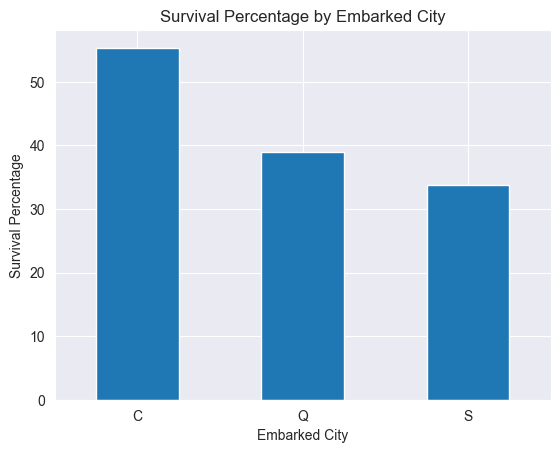

In [36]:
survival_percentage = df.groupby('Embarked')['Survived'].mean() * 100
survival_percentage.plot(kind='bar', rot=0)
plt.title('Survival Percentage by Embarked City')
plt.xlabel('Embarked City')
plt.ylabel('Survival Percentage')
plt.show()

People who embarked from Cherbourg had the highest survival rate, while people who embarked from Southampton had the lowest survival rate. This could just be a coincidence but it could also be because people who embarked from Cherbourg were prioritized when it came to saving people or their cabins were closer to the lifeboats.

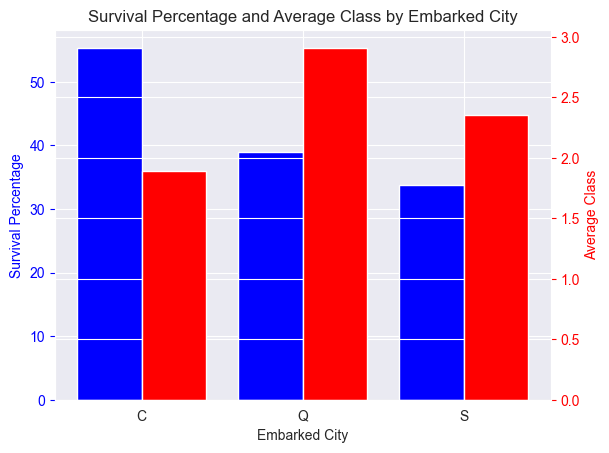

In [57]:
survival_percentage = df.groupby('Embarked')['Survived'].mean() * 100
average_class = df.groupby('Embarked')['Pclass'].mean()
x = np.arange(len(survival_percentage))
fig, ax1 = plt.subplots()
ax1.bar(x - 0.2, survival_percentage, color='b', width=0.4, alpha=1, label='Survival Percentage')
ax1.set_xlabel('Embarked City')
ax1.set_ylabel('Survival Percentage', color='b')
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.bar(x + 0.2, average_class, color='r', width=0.4, alpha=1, label='Average Class')
ax2.set_ylabel('Average Class', color='r')
ax2.tick_params('y', colors='r')
plt.xticks(x, survival_percentage.index)
plt.title('Survival Percentage and Average Class by Embarked City')
plt.show()

In this graph you can see the survival percentage and average class of the passengers depending on the city they embarked from and the average class of the passengers from that city. There does not seem to be any correlation between the city of embarkation and the average class of the passengers from that city in relation to the survival percentage of the passengers from that city. This would've been one explanation for the different survival rates of the three cities.

## 2.6

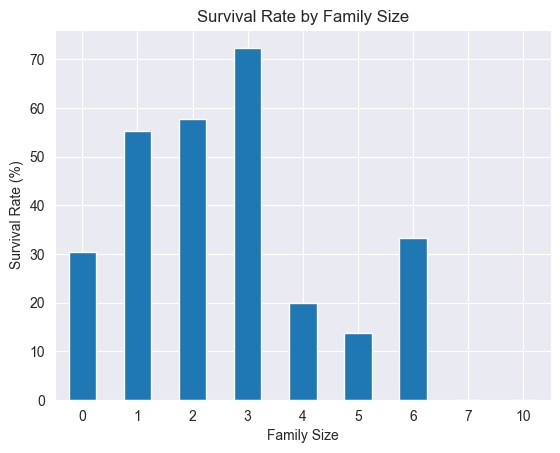

In [62]:
df['FamilySize'] = df['SibSp'] + df['Parch']
survival_rate_by_family_size = df.groupby('FamilySize')['Survived'].mean() * 100
survival_rate_by_family_size.plot(kind='bar', rot=0)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate (%)')
plt.show()

This graph shows the survival rate depending on the family size of any one passenger. Passengers with 3 relatives on board had the highest survival rate, couples and families of 3 had a high survival rate, singles and very large families (5 persons or more) had the lowest survival rate. 

## 3. Conclusion
As expected passengers in a higher class were much more likely to survive than passengers of a lower class.
Women and children seemed to be saved first following the [Women and children first protocol](https://en.wikipedia.org/wiki/Women_and_children_first). Elderly people were also more likely to survive than other passengers, although not as significantly as children. Males between 20 and 35 years of age were the most likely to die. There seems to be a correlation between the city where a passenger embarked and his survival rate. I am not totally sure why that is the case, the survival rate of the cities is not in relation to the average passenger class of said city. There is still the possibility though that the passengers from Southampton and Queensland got cabins further away from emergency exits and lifeboats in their respective class than those from Cherbourg.
The survival rate is highest for people in cabins B, D and E. These were mostly first and second class cabins. The survival rate drops off significantly at F, G and E which were for third class passengers and on the lowest deck used for accommodation. One interesting observation is that passengers in cabin class A had the lowest survival rate even though they were first class passengers. These cabins were on the main deck, so they should've had the shortest way to the lifeboats. Cabins B were close to the bow of the ship which sank first but still had the highest survival rate. Maybe, since the impact with the iceberg was on the starboard side close to the bow of the ship where cabins B were, they noticed first the severity of the situation and rushed to the lifeboats first. 
Couples and families of three had the highest survival rate, this correlates with the highly increased survival rate for children and women. Singles were mostly male (not shown here as a graph here but I analyzed the data to make sure that that is indeed the case), so they were the most likely to stay behind and die. Very large families also had a lower survival rate, probably because of space constraints on the lifeboats and the low chance for a 5+ member family to find enough space on a lifeboat for everyone. 